# **Generador Aleatorio de Diagramas de Circuitos Resistivos** 
#### By: Cristian Alape, Alvaro Zarabanda, Youssef Ortiz 

## *Primera actividad*

Conociendo los conceptos de las leyes de Kirchhoff y el concepto de malla. A través de un código que lo genere, obtener el diagrama de un circuito aleatorio de una malla, que solo tiene cuatro elementos:

$X = \left[ 2,3,4,5 \right]$ 

$P = \left[ \frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{4} \right]$

$H = va(x, p, 2, 1)$

$V = va(x, p, 2, 1)$

Determinar matemáticamente el valor de la probabilidad de que el circuito generado cumpla con las leyes de Kirchhoff, si se considera que los parámetros de los elementos son distintos. Luego, validen dicho resultado por medio de una simulación.

Para determinar estas probabilidades inicialmente, según la naturaleza de las leyes de Kirchhoff se evalúan dos criterios de invalidez para diagramas de circuitos resistivos de una malla 

### **Criterio 1**: cuando hay más de una fuente de corriente en el circuito de una malla 

cuando se tiene una fuente de corriente en un circuito de una sola malla (es decir, conectada en serie), la fuente de corriente debe tener el mismo valor y dirección de corriente para que el circuito sea físicamente consistente, todos los componentes están conectados en serie. Esto significa que la misma corriente fluye a través de cada componente del circuito.

Si se intentara imponer una segunda fuente de corriente, por ejemplo, una de 2 amperios, y otra fuente en serie de 3 amperios en la misma dirección, esto es físicamente imposible. La corriente en un circuito en serie debe ser la misma en todos los puntos.

### **Criterio 2**: cuando hay solo voltajes (4) y cortos (2) 

En un circuito de una malla no todos sus elementos pueden ser cortocircuitos porque esto eliminaría la función del circuito, además, La Ley de Voltajes de Kirchhoff (LVK) establece que la suma algebraica de todas las diferencias de potencial alrededor de cualquier lazo cerrado debe ser igual a cero. Si se tiene una fuente de voltaje (V) en la malla y todos los demás elementos son cortocircuitos (con una caída de voltaje idealmente cero), la ecuación de la LVK sería:

$V - 0 - 0 - ... - 0 = 0 $

$V = 0$

Esto implica que la fuente de voltaje debe ser cero, lo cual contradice la existencia de una fuente de voltaje activa. 

### Procedimiento para generar los circuitos aleatorios  

Inicialmente se define la función va(x,p,m,n) la cual recibe los siguientes parámetros:
- **x**: el conjunto de datos de la matriz según los números asignados a los diferentes elementos del circuito resistivo 
- **p**:  distribuciones de probabilidad sobre el conjunto de valores el x. cada elemento de p representa la probabilidad de que cada elemento de x sea seleccionado en el circuito.
- **m**: filas de la matriz de entrada
- **n**:  columnas de la matriz de entrada  

El objetivo de esta función es realizar un muestreo aleatorio con los elementos de x. Esto significa que cada vez que se selecciona un elemento para la matriz, se hace de forma independiente según las probabilidades definidas en p.  

La probabilidad de seleccionar un valor específico de x es siempre la misma, independientemente de las selecciones anteriores. Por lo tanto, esta función implementa un proceso para generar realizaciones de matrices aleatorias basadas en una distribución de probabilidad discreta dada. 

Una vez definida la función va, que genera las matrices de forma aleatoria, se definen 100000 experimentos aleatorios en la simulación donde se generan las matrices del circuito generado en cada iteración. 

### Experimento aleatorio

Este consiste en realizar cuatro extracciones independientes de la lista de elementos del circuito $(x = [2, 3, 4, 5])$, donde cada número corresponde a un elemento y tiene una probabilidad de $(p = 0.25)$ de ser seleccionado. Estas cuatro extracciones se obtienen combinando los elementos de dos matrices $(H)$ y $(V)$, cada una de dimensión $(1 \times 2)$, generadas por la función va. 

### Espacio muestral

El espacio muestral $(\Omega)$ de este experimento consiste en todas las posibles combinaciones de elementos del circuito definidos como: $({2, 3, 4, 5})$. El tamaño del espacio muestral es $(|\Omega| = 4^4 = 256)$, ya que cada una de las cuatro posiciones puede tomar uno de los cuatro valores posibles. Se asume que cada una de estas 256 secuencias es equiprobable, con una probabilidad de $((0.25)^4 = \frac{1}{256})$. 

### Probabilidades en criterio 1  

- SI aparecen dos fuentes de corriente hay $(\binom{4}{2} = 6)$ formas de elegir las dos posiciones donde aparece. Las otras dos posiciones pueden tomar cualquiera de los otros 3 elementos $(({2, 3, 4}))$. Por lo tanto, hay $(6 \times 3^2 = 54)$ secuencias donde la fuente de corriente aparece exactamente dos veces.
- Si aparecen tres fuentes de corriente hay $(\binom{4}{3} = 4)$ formas de elegir las tres posiciones donde aparece. La otra posición puede tomar cualquiera de los otros 3 valores. Por lo tanto, hay $(4 \times 3^1 = 12)$ secuencias donde la fuente de corriente aparece exactamente tres veces.
- Si aparecen cuatro fuentes de corriente hay $(\binom{4}{4} = 1)$ forma de que aparezca en las cuatro posiciones (la secuencia es $[5, 5, 5, 5]$)

El número total de secuencias que cumplen la Condición 1 es $(54 + 12 + 1 = 67)$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{67}{256})$. 

### Probabilidades criterio 2  

Cuando todos los elementos son cortocircuitos o fuentes de voltaje, si consideramos que estos elementos hay $(2^4 = 16)$ secuencias de este tipo de elementos. Por lo tanto, hay $(16 - 1 = 15)$ secuencias que cumplen la Condición 2, por lo tanto, $(\frac{15}{256})$. 

### Probabilidad Teórica Total 

Se define teorico_total = teorico_1 + teorico_2. Esto es demustra porque las dos condiciones son mutuamente excluyentes. Si la Condición 1 se cumple (la fuente de corriente aparece al menos dos veces), entonces la Condición 2 no puede cumplirse (ya que la Condición 2 requiere que todos los elementos sean cortocircuitos o fuentes de voltaje). 

Por lo tanto, la probabilidad teórica de que se cumpla la Condición 1 o la Condición 2 es: $[P(\text{Condición 1 o Condición 2}) = P(\text{Condición 1}) + P(\text{Condición 2}) = \frac{67}{256} + \frac{15}{256} = \frac{82}{256} = \frac{41}{128}]$ 

### Resultados Experimentales 

La simulación corre el experimento aleatorio 100,000 veces. Las variables almacenan las frecuencias relativas con las que se cumplen la Condición 1 y la Condición 2, respectivamente. Según la Ley de los Grandes Números, a medida que el número de experimentos aumenta, estas frecuencias relativas deberían aproximarse a las probabilidades teóricas correspondientes. 
- fr_1 debería ser aproximadamente igual a teorico_1 $((\frac{67}{256} \approx 0.2617))$.
- fr_2 debería ser aproximadamente igual a teorico_2 $((\frac{15}{256} \approx 0.0586))$.
- fr_total debería ser aproximadamente igual a teorico_total $((\frac{82}{256} \approx 0.3203))$. 

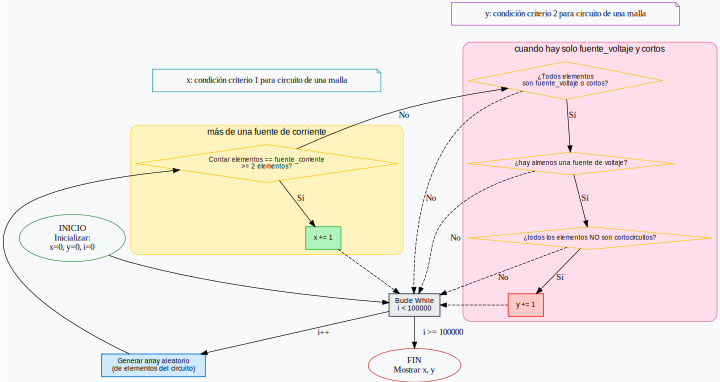

In [11]:
from graphviz import Digraph

dot = Digraph('LoopValidation', filename='loop_validation.gv')
dot.attr(rankdir='TB', size='10,8', bgcolor='#f8f9fa', fontname='Helvetica')

# ===== ESTILOS =====
node_style = {
    'style': 'filled',
    'fontname': 'Helvetica',
    'fontsize': '11',
    'shape': 'box',
    'penwidth': '1.5'
}

cond_style = {
    'shape': 'diamond',
    'fillcolor': '#ffec99',
    'color': '#ffc300',
    'fontname': 'Helvetica',
    'fontsize': '10'
}

# ===== NODOS PRINCIPALES =====
dot.node('Start', 'INICIO\nInicializar:\nx=0, y=0, i=0', 
         shape='ellipse', fillcolor='#40c057', color='#2b8a3e')

dot.node('Loop', 'Bucle While\ni < 100000', 
         fillcolor='#e9ecef', color='#495057', **node_style)

dot.node('GenArray', 'Generar array aleatorio\n(de elementos del circuito)', 
         fillcolor='#d0ebff', color='#1c7ed6', **node_style)

# ===== CONDICIÓN X =====
with dot.subgraph(name='cluster_x') as x_cluster:
    x_cluster.attr(label='más de una fuente de corriente', style='rounded,filled',
                  fillcolor='#fff3bf', color='#ffd43b')
    
    x_cluster.node('Check5', 'Contar elementos == fuente_corriente \n>= 2 elementos?', **cond_style)
    x_cluster.node('IncX', 'x += 1', 
                  fillcolor='#b2f2bb', color='#40c057', **node_style)

# ===== CONDICIÓN Y =====
with dot.subgraph(name='cluster_y') as y_cluster:
    y_cluster.attr(label='cuando hay solo fuente_voltaje y cortos', style='rounded,filled',
                  fillcolor='#ffdeeb', color='#f06595')
    
    y_cluster.node('CheckAll24', '¿Todos elementos\nson fuente_voltaje o cortos?', **cond_style)
    y_cluster.node('CheckAny4', '¿hay almenos una fuente de voltaje?', **cond_style)
    y_cluster.node('CheckAll2', '¿todos los elementos NO son cortocircuitos?', **cond_style)
    y_cluster.node('IncY', 'y += 1', 
                  fillcolor='#ffc9c9', color='#f03e3e', **node_style)

dot.node('End', 'FIN\nMostrar x, y', 
         shape='ellipse', fillcolor='#fa5252', color='#c92a2a')

# ===== CONEXIONES PRINCIPALES =====
dot.edge('Start', 'Loop')
dot.edge('Loop', 'GenArray', label='i++')
dot.edge('GenArray', 'Check5')

# Flujo Condición X
dot.edge('Check5', 'IncX', label='Sí')
dot.edge('Check5', 'CheckAll24', label='No')

# Flujo Condición Y
dot.edge('CheckAll24', 'CheckAny4', label='Sí')
dot.edge('CheckAll24', 'Loop', label='No', style='dashed')
dot.edge('CheckAny4', 'CheckAll2', label='Sí')
dot.edge('CheckAny4', 'Loop', label='No', style='dashed')
dot.edge('CheckAll2', 'IncY', label='Sí')
dot.edge('CheckAll2', 'Loop', label='No', style='dashed')

# Conexiones finales
dot.edge('IncX', 'Loop', style='dashed')
dot.edge('IncY', 'Loop', style='dashed')
dot.edge('Loop', 'End', label='i >= 100000')

# ===== NOTAS =====
dot.node('NoteX', 'x: condición criterio 1 para circuito de una malla', 
         shape='note', fillcolor='#e3fafc', color='#1098ad')
dot.node('NoteY', 'y: condición criterio 2 para circuito de una malla', 
         shape='note', fillcolor='#f3d9fa', color='#9c36b5')

dot.edge('NoteX', 'Check5', style='invis')
dot.edge('NoteY', 'CheckAll24', style='invis')

dot